In [1]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import numpy as np
import scipy.io
import scipy.stats as stats
from scipy.stats import norm, randint, mode
import pandas as pd
from lime import lime_tabular
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_new.csv') #  EBR, GFE(Sat), and GFE(tot), and their corresponding gradient values. 
#data = data.dropna(axis=1, how='all') # Drop features that have nan values
labels = data['labels']
mat = scipy.io.loadmat('signs.mat')
signs = mat['allsgn']

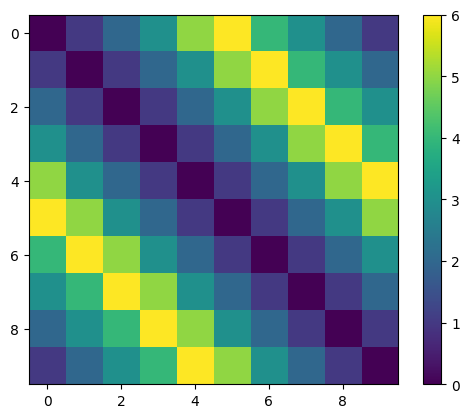

In [3]:
trClass = np.zeros(1000)
for j in range(0,10):
    # Class 1
    for i in range(2,100,11):
        trClass[i+j*100-1] = 1

    for i in range(11,100,11):
        trClass[i+j*100-1] = 1
    

    # Class 2
    for i in range(3,100,11):
        trClass[i+j*100-1] = 2

    for i in range(21,100,11):
        trClass[i+j*100-1] = 2
    
    # Class 3
    for i in range(4,100,11):
        trClass[i+j*100-1] = 3

    for i in range(31,100,11):
        trClass[i+j*100-1] = 3
    
    # Class 4
    for i in range(5,100,11):
        trClass[i+j*100-1] = 4

    for i in range(41,100,11):
        trClass[i+j*100-1] = 4

    # Class 5
    for i in range(5,100,11):
        trClass[i+j*100-1] = 5

    for i in range(41,100,11):
        trClass[i+j*100-1] = 5

    # Class 6
    for i in range(6,100,11):
        trClass[i+j*100-1] = 6

    for i in range(51,100,11):
        trClass[i+j*100-1] = 6

    # Class 1
    trClass[9+j*100] = 1
    trClass[90+j*100] = 1

    # Class 2
    trClass[8+j*100] = 2
    trClass[19+j*100] = 2
    trClass[80+j*100] = 2
    trClass[91+j*100] = 2


    # Class 3
    trClass[7+j*100] = 3
    trClass[18+j*100] = 3
    trClass[29+j*100] = 3
    trClass[70+j*100] = 3
    trClass[81+j*100] = 3
    trClass[92+j*100] = 3

    # Class 4
    trClass[6+j*100] = 4
    trClass[17+j*100] = 4
    trClass[28+j*100] = 4
    trClass[39+j*100] = 4
    trClass[60+j*100] = 4
    trClass[71+j*100] = 4
    trClass[82+j*100] = 4
    trClass[93+j*100] = 4


plt.imshow(trClass[100:200].reshape([10,10]))
plt.colorbar()
plt.show()

## Plot AUC according to Transition Class

### AUC is computed using 6-fold cross validation using ALL the features

In [4]:
auc = np.zeros(1000)
coords = np.zeros([3,1000])
for i in range(0,1000):
    clf = LogisticRegression(max_iter=1000)
    columnsToSelect = np.array([i, i+1000, i+2000])
    dataCLF = data.iloc[:,columnsToSelect]
    coords[:,i] = np.mean(dataCLF,axis=0)
    auc[i] = np.mean(cross_val_score(clf, dataCLF, labels, cv=6, scoring='roc_auc'))


    

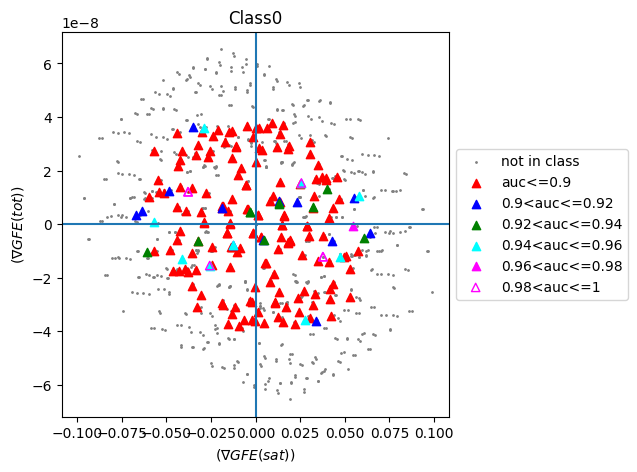

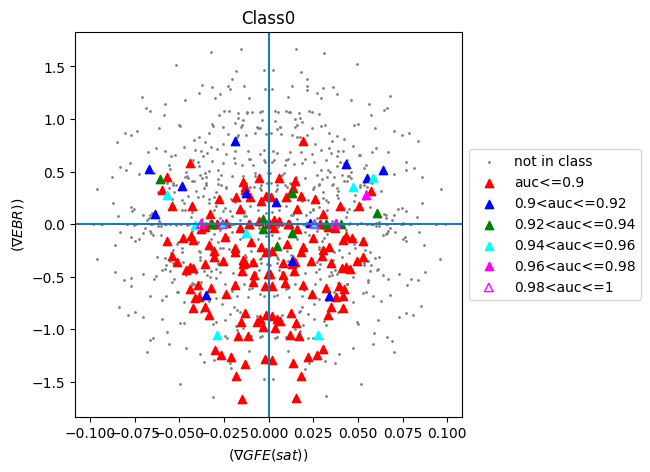

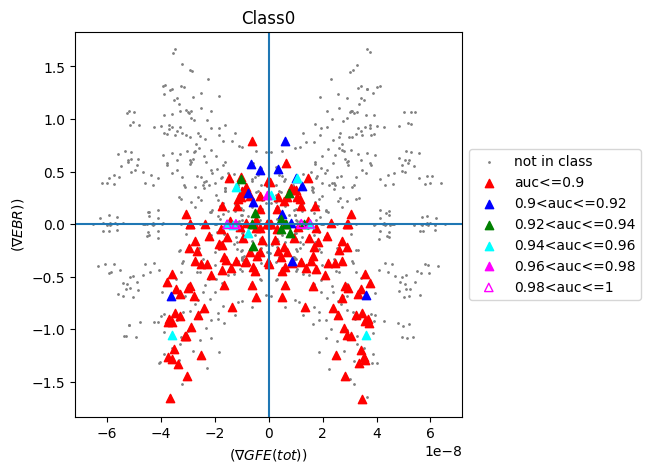

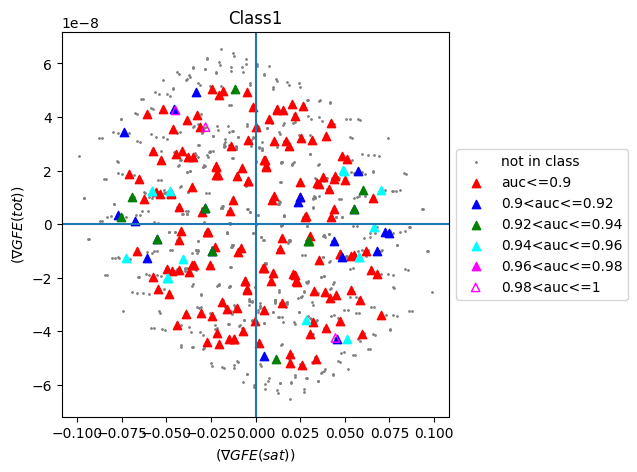

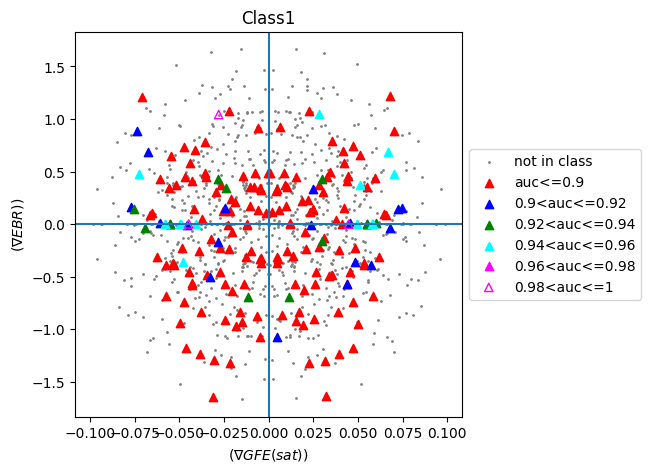

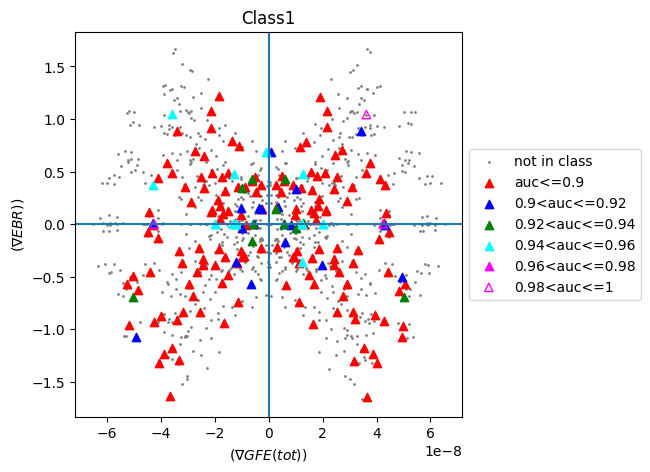

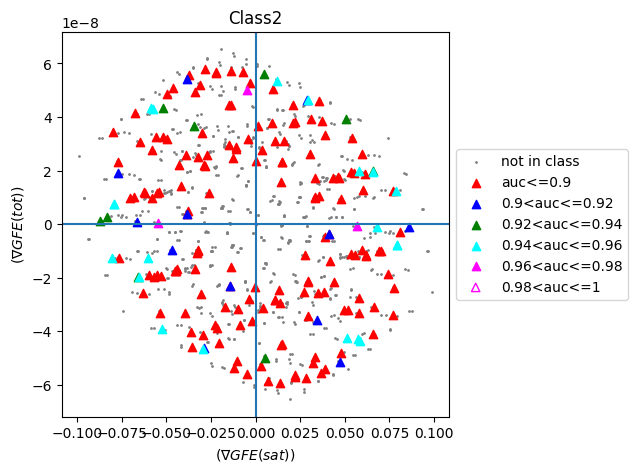

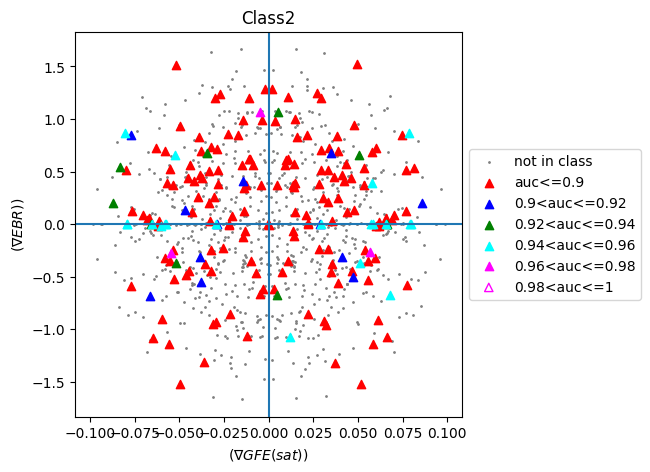

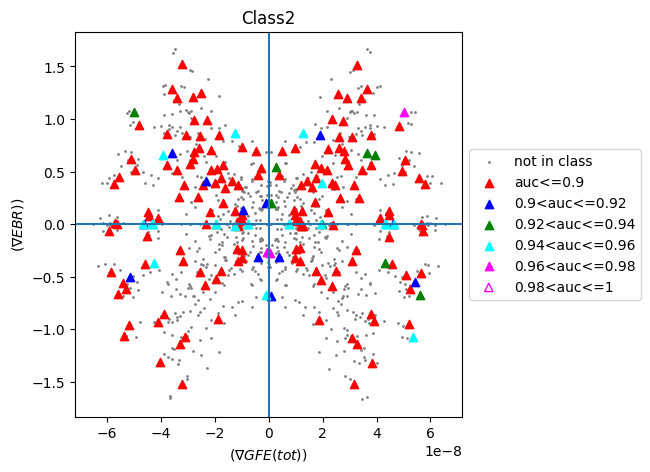

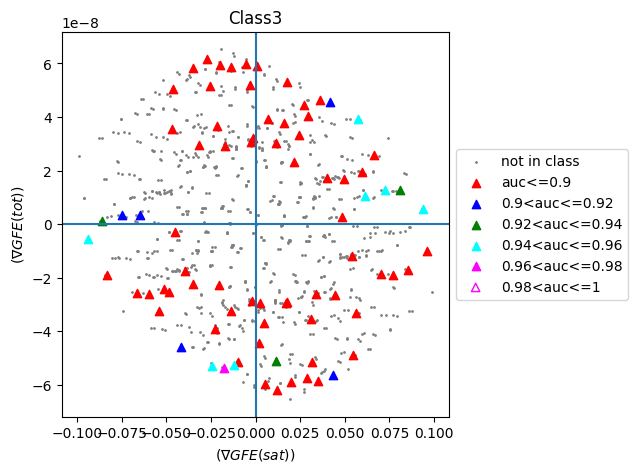

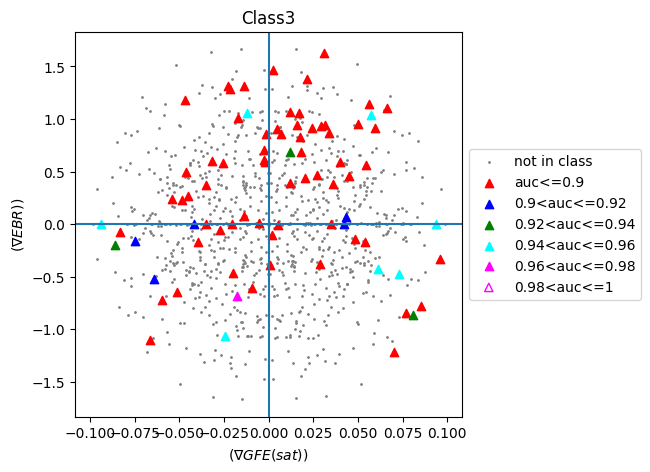

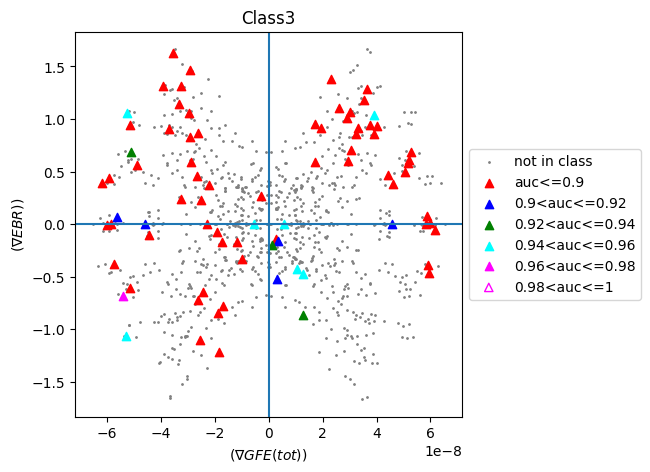

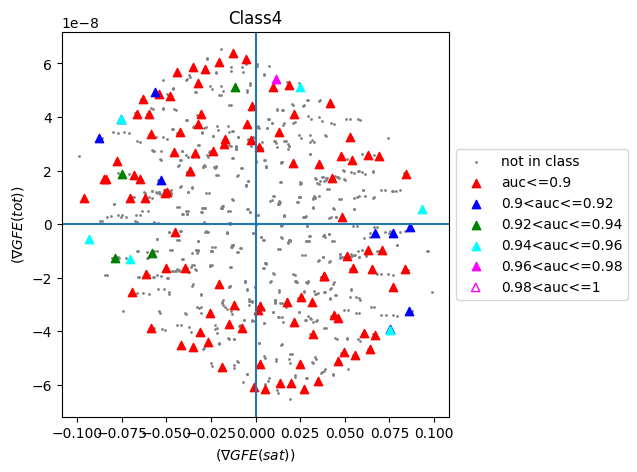

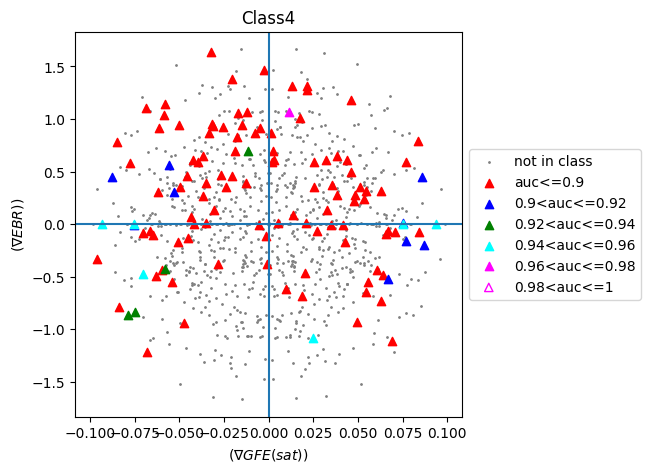

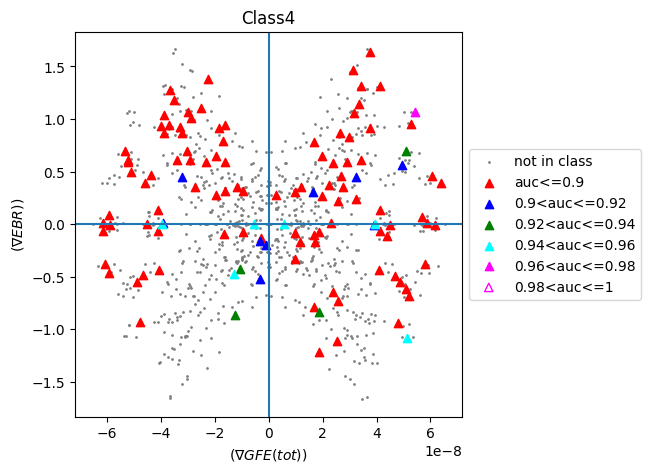

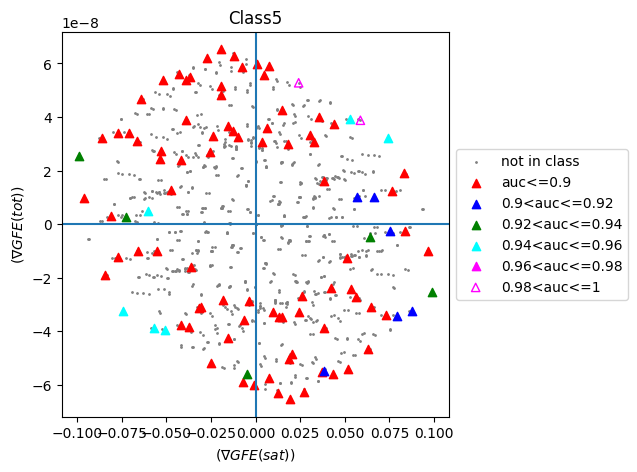

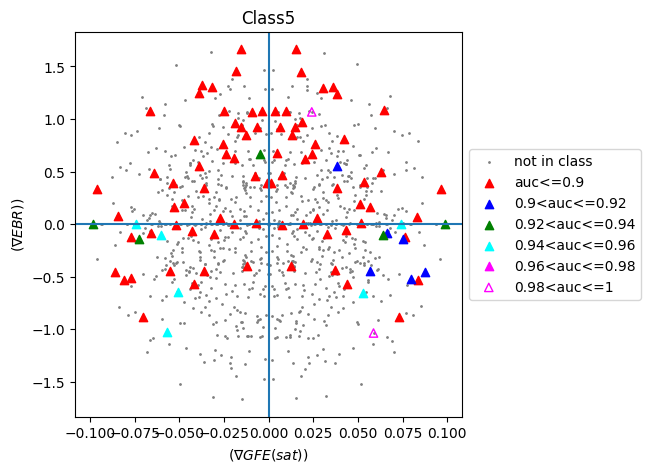

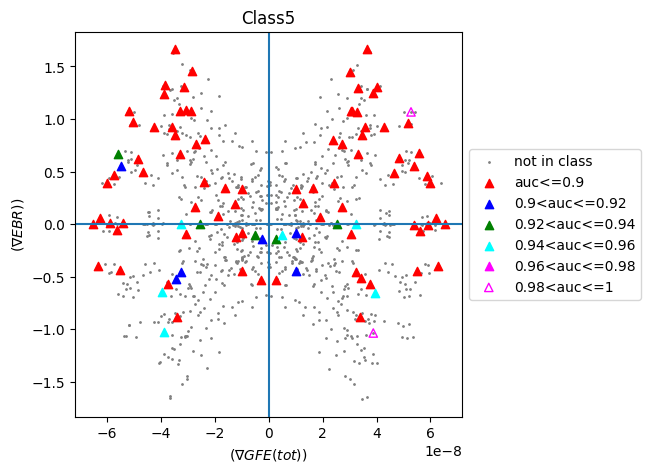

In [5]:
import matplotlib.pyplot as plt
for k in range(1,7):
    for x in range(0,2):
        for y in range(x+1,3):
            plt.figure(figsize=(5,5))
            plt.scatter(coords[x,:], coords[y,:],marker='o', s=1,c='grey'),
            plt.scatter(coords[x,(trClass == k)&(auc<=0.9)], 
                        coords[y,(trClass == k)&(auc<=0.9)], 
                        marker='^',c='red')
            plt.scatter(coords[x,(trClass == k)&(auc>0.90)&(auc<=0.92)], 
                        coords[y,(trClass == k)&(auc>0.90)&(auc<=0.92)], 
                        marker='^',c='blue')
            plt.scatter(coords[x,(trClass == k)&(auc>0.92)&(auc<=0.94)], 
                        coords[y,(trClass == k)&(auc>0.92)&(auc<=0.94)], 
                        marker='^',c='green')
            plt.scatter(coords[x,(trClass == k)&(auc>0.94)&(auc<=0.96)], 
                        coords[y,(trClass == k)&(auc>0.94)&(auc<=0.96)], 
                        marker='^',c='cyan')
            plt.scatter(coords[x,(trClass == k)&(auc>0.96)&(auc<=0.98)], 
                        coords[y,(trClass == k)&(auc>0.96)&(auc<=0.98)], 
                        marker='^',c='magenta')
            plt.scatter(coords[x,(trClass == k)&(auc>0.98)&(auc<=1)], 
                        coords[y,(trClass == k)&(auc>0.98)&(auc<=1)], 
                        marker='^',edgecolors='magenta', facecolors='none')
            plt.axhline(y = 0)
            plt.axvline(x = 0)
            if x==0:
                plt.xlabel('('r'$\nabla GFE(sat))$')
            elif x==1:
                plt.xlabel('('r'$\nabla GFE(tot))$')
            else:
                plt.xlabel('('r'$\nabla EBR))$')
             
            if y==0:
                plt.ylabel('('r'$\nabla GFE(sat))$')
            elif y==1:
                plt.ylabel('('r'$\nabla GFE(tot))$')
            else:
                plt.ylabel('('r'$\nabla EBR))$')   

            #plt.xlabel('('r'$\nabla GFE(sat))$')
            #plt.ylabel('('r'$\nabla EBR)$')
            plt.title('Class' + str(k-1))
            plt.legend(["not in class", "auc<=0.9", "0.9<auc<=0.92", 
                        "0.92<auc<=0.94", "0.94<auc<=0.96", "0.96<auc<=0.98", "0.98<auc<=1"], 
                        loc='center left', bbox_to_anchor=(1, 0.5))

            plt.show()

### 3D view of these plots

In [6]:
import plotly.graph_objects as go

for k in range(1,7):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d( 
        x = coords[0,:],
        y = coords[1,:],
        z = coords[2,:], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = 'not in class',
        # Properties associated with points 
        marker=dict(
            size=1, # Size
            color='grey', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='black') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc<=0.9)],
        y = coords[1,(trClass == k)&(auc<=0.9)],
        z = coords[2,(trClass == k)&(auc<=0.9)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = 'auc<=0.90',
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='red', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='red') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc>0.90)&(auc<=0.92)],
        y = coords[1,(trClass == k)&(auc>0.90)&(auc<=0.92)],
        z = coords[2,(trClass == k)&(auc>0.90)&(auc<=0.92)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = '0.90<auc<=0.92',
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='blue', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='blue') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc>0.92)&(auc<=0.94)],
        y = coords[1,(trClass == k)&(auc>0.92)&(auc<=0.94)],
        z = coords[2,(trClass == k)&(auc>0.92)&(auc<=0.94)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = '0.92<auc<=0.94',
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='green', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='green') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc>0.94)&(auc<=0.96)],
        y = coords[1,(trClass == k)&(auc>0.94)&(auc<=0.96)],
        z = coords[2,(trClass == k)&(auc>0.94)&(auc<=0.96)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = '0.94<auc<=0.96',
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='cyan', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='cyan') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc>0.96)&(auc<=0.98)],
        y = coords[1,(trClass == k)&(auc>0.96)&(auc<=0.98)],
        z = coords[2,(trClass == k)&(auc>0.96)&(auc<=0.98)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = '0.96<auc<=0.98', 
        
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='magenta', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='magenta') # Properties of the edges
        ),
    )
    )

    fig.add_trace(go.Scatter3d( 
        x = coords[0,(trClass == k)&(auc>0.98)],
        y = coords[1,(trClass == k)&(auc>0.98)],
        z = coords[2,(trClass == k)&(auc>0.98)], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name = 'auc>0.98',
        # Properties associated with points 
        marker=dict(
            size=3, # Size
            color='white', # Color
            opacity=0.2, # Point transparency 
            line=dict(width=1, color='magenta') # Properties of the edges
        ),
    )
    )

    fig.update_layout(
        title='Class: ' +str(k-1), 
        autosize=False,
        width=800, 
        height=800,
        scene=dict(
            xaxis_title='('r'$\nabla GFE(sat))$',
            yaxis_title='('r'$\nabla GFE(tot))$',
            zaxis_title='('r'$\nabla EBR))$',
        ),
    )
    fig.show()